In [109]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

%matplotlib inline

### Import the necessary data

In [110]:
labeled = pd.read_csv("data/chart_labeled_playlist_tracks_data.csv")
labeled.head()


,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_acoustic_prob,predicted_rnb_prob,predicted_rock_prob
0,6zGPytJiZmFuyVq7RTNO9G,Get Me,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,0GzsdiiItPCABfhuFIKiZi,185418,2020-01-28,62,0.824,0.503,...,0.000053,0.1070,0.784,0.349654,1,rnb,1.0,0.0,1.0,0.0
1,6llZj9wHfbUCUjthixF9VF,Carino Brutal,50ifAXDdkDGG0RTON2If8K,Slapshock,1iZQ6qSwNzXxL91AZwq1dC,265573,2009-06-12,52,0.534,0.957,...,0.000005,0.0683,0.368,0.445741,2,rock,1.0,0.0,0.0,1.0
2,3agtg0x11wPvLIWkYR39nZ,Somewhere I Belong,6XyY86QOPPrYVGvF9ch6wz,Linkin Park,4Gfnly5CzMJQqkUFfoHaP3,213933,2003-03-24,65,0.451,0.951,...,0.000002,0.2610,0.442,0.673728,2,rock,1.0,0.0,0.0,1.0
3,4Yf5bqU3NK4kNOypcrLYwU,Faint,6XyY86QOPPrYVGvF9ch6wz,Linkin Park,4Gfnly5CzMJQqkUFfoHaP3,162600,2003-03-24,72,0.554,0.978,...,0.000000,0.0731,0.594,0.507778,2,rock,1.0,0.0,0.0,1.0
4,1pfgsjmxVZhoZpeDx6POKv,Bones (feat. OneRepublic),4sTQVOfp9vEMCemLw50sbu,Galantis,49vus1VCWc7AbgDmKYb8SC,205792,2019-01-31,71,0.658,0.804,...,0.000000,0.1780,0.508,0.415185,2,rock,1.0,0.0,0.0,1.0


In [111]:
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [112]:
opm = pd.read_csv("data/opm_playlist_tracks_data.csv")
opm.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name
0,3VcVQmMivq2ISfKUmIuvMK,Rainbow,6ZgBJRjJsK1iOJGKGZxEUv,South Border,6bMej3xtNOTiiHLdhR4wzX,347120,2005-01-01,63,0.660,0.224,...,-13.426,1,0.0307,0.425,0.000002,0.1010,0.382,88.011,3VcVQmMivq2ISfKUmIuvMK,3VcVQmMivq2ISfKUmIuvMK
1,3OpGUlDmRUXh0NkIYWoIlD,Your Song,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,0kV35wyXIJKk04VRG0DdF4,168493,2003,66,0.636,0.159,...,-13.117,1,0.0549,0.892,0.000000,0.1120,0.658,119.766,3OpGUlDmRUXh0NkIYWoIlD,3OpGUlDmRUXh0NkIYWoIlD
2,761frfZtZ8I2g70UsjFfBK,I Need You More Today,3XEHRbR9NMWfNzQ6TQMS9M,Caleb Santos,4TyVEjoScAou6qVjhXyYfp,233728,2016-12-02,63,0.474,0.522,...,-7.513,1,0.0408,0.360,0.000000,0.1230,0.448,157.225,761frfZtZ8I2g70UsjFfBK,761frfZtZ8I2g70UsjFfBK
3,1yDiru08Q6omDOGkZMPnei,Maybe The Night,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,6LhZ3QMHGJeTes9cCTxK8e,217197,2017-10-27,69,0.572,0.522,...,-9.095,1,0.0367,0.113,0.000049,0.1140,0.498,74.050,1yDiru08Q6omDOGkZMPnei,1yDiru08Q6omDOGkZMPnei
4,54b8IPvheXDpro2VR2rWAS,Ivana,2EGJbNf0Hva2C2N6hvhMXD,Soulstice,10stEx5J17TekHdjeh9dOJ,246550,2020-01-06,61,0.870,0.483,...,-7.441,1,0.2970,0.281,0.000000,0.0526,0.611,100.012,54b8IPvheXDpro2VR2rWAS,54b8IPvheXDpro2VR2rWAS


In [113]:
nyoy = pd.read_csv('data/Nyoy Volante labeled_playlist_tracks_data.csv')

In [116]:
scaler = MinMaxScaler()
labeled['loudness'] = scaler.fit_transform(labeled[['loudness']])
labeled['tempo'] =  scaler.fit_transform(labeled[['tempo']])
opm['loudness'] = scaler.fit_transform(opm[['loudness']])
opm['tempo'] =  scaler.fit_transform(opm[['tempo']])
nyoy['loudness'] = scaler.fit_transform(nyoy[['loudness']])
nyoy['tempo'] =  scaler.fit_transform(nyoy[['tempo']])

In [117]:
labeledcharts_df = pd.merge(charts_df, labeled, on = 'track_id')
labeledcharts_df.head()

,date,position,track_id,track_name_x,artist,streams,track_name_y,artist_id,artist_name,album_id,...,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_acoustic_prob,predicted_rnb_prob,predicted_rock_prob
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,...,0.0,0.083,0.301,0.748102,1,rnb,0.5,0.333333,0.5,0.166667
1,2017-01-02,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,218117,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,...,0.0,0.083,0.301,0.748102,1,rnb,0.5,0.333333,0.5,0.166667
2,2017-01-03,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,237065,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,...,0.0,0.083,0.301,0.748102,1,rnb,0.5,0.333333,0.5,0.166667
3,2017-01-04,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,238409,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,...,0.0,0.083,0.301,0.748102,1,rnb,0.5,0.333333,0.5,0.166667
4,2017-01-05,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,244616,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,...,0.0,0.083,0.301,0.748102,1,rnb,0.5,0.333333,0.5,0.166667


In [118]:
labeledcharts_df = labeledcharts_df.drop(columns='track_name_y')
labeledcharts_df = labeledcharts_df.rename(columns={'track_name_x':'track_name'})



In [119]:
labeledcharts_df.shape

(294600, 29)

### Check the Musical trend of Spotify top 200

In [120]:
labeledcharts_df['date'] = pd.to_datetime(labeledcharts_df['date'])
labeledcharts_df = labeledcharts_df.set_index('date')

In [121]:
trend = labeledcharts_df.groupby(['predicted_genre'])['streams'].resample('M').sum().reset_index()

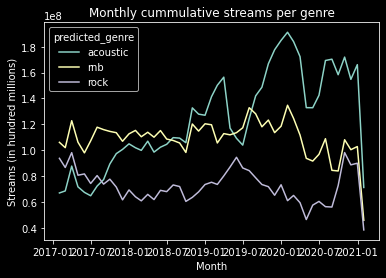

In [122]:
plt.style.use('dark_background')
sns.lineplot(data=trend, x="date", y="streams", hue="predicted_genre")
plt.xlabel('Month')
plt.ylabel('Streams (in hundred millions)')
plt.title('Monthly cummulative streams per genre')
plt.show()

### Get the acoustic OPM in charts

In [123]:
chart_acoustic = labeledcharts_df[labeledcharts_df['predicted_genre']=='acoustic']
chart_acoustic.size

3484376

In [124]:
opmlist = opm['track_id']
opm_chart_acoustic = chart_acoustic[chart_acoustic['track_id'].isin(opmlist)]
opm_chart_acoustic.size

1358896

In [125]:
opm_chart_acoustic.head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_acoustic_prob,predicted_rnb_prob,predicted_rock_prob
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,40,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,52955,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,38jqi8VvSax4miNL2cacD1,241029,2015-04-08,...,0.0,0.0669,0.265,0.193425,0,acoustic,0.75,0.75,0.166667,0.083333
2017-01-02,39,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,62718,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,38jqi8VvSax4miNL2cacD1,241029,2015-04-08,...,0.0,0.0669,0.265,0.193425,0,acoustic,0.75,0.75,0.166667,0.083333
2017-01-03,40,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,68120,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,38jqi8VvSax4miNL2cacD1,241029,2015-04-08,...,0.0,0.0669,0.265,0.193425,0,acoustic,0.75,0.75,0.166667,0.083333
2017-01-04,37,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,68285,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,38jqi8VvSax4miNL2cacD1,241029,2015-04-08,...,0.0,0.0669,0.265,0.193425,0,acoustic,0.75,0.75,0.166667,0.083333
2017-01-05,38,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,68635,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,38jqi8VvSax4miNL2cacD1,241029,2015-04-08,...,0.0,0.0669,0.265,0.193425,0,acoustic,0.75,0.75,0.166667,0.083333


In [126]:
print('The highest popularity of an opm acoustic song is %d and lowest is %d'  % (opm_chart_acoustic['popularity'].max(), opm_chart_acoustic['popularity'].min()))

The highest popularity of an opm acoustic song is 98 and lowest is 0


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


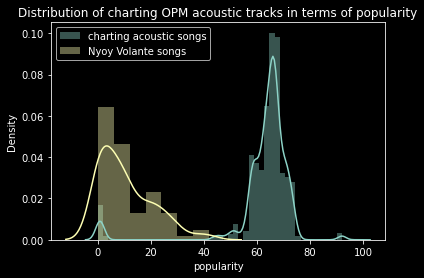

In [127]:
plt.style.use('dark_background')
sns.distplot(opm_chart_acoustic['popularity'], label = 'charting acoustic songs')
sns.distplot(nyoy['popularity'], label = 'Nyoy Volante songs')
plt.legend()
plt.title('Distribution of charting OPM acoustic tracks in terms of popularity')
plt.show()

### Get the top acoustic artists by minimum position of their tracks and total streams

In [140]:
topartist = opm_chart_acoustic.groupby(['artist_id','artist_name']).agg({'position':['mean'], 'streams':['sum']}).reset_index()

In [141]:
topartist.columns = topartist.columns.get_level_values(0)
topartist.sort_values(by='streams', ascending = False).head()

,artist_id,artist_name,position,streams
40,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,49.249442,430704736
6,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,79.045880,212291752
47,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,69.701440,208551362
70,7tKpXx21KVUOR6vvDs6xtg,I Belong to the Zoo,47.229249,155143287
46,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,105.949874,104043359


### Checking the charted tracks with audio features nearest to the tracks of Nyoy

In [130]:
#get the recmmender pool
pool = labeled[(labeled['track_id'].isin(opmlist)) & (labeled['predicted_genre']=='acoustic')]

In [131]:
feature_cols = ['danceability',\
                'energy',\
                'loudness',\
                'speechiness',\
                'acousticness',\
                'instrumentalness',\
                #'liveness',\
                'valence',\
                'tempo'\
               ]

In [132]:
#get representative tracks of Nyoy
nyoymax = nyoy[nyoy['popularity']==nyoy['popularity'].max()][:1]
nyoymedian = nyoy[nyoy['popularity']==nyoy['popularity'].median()][:1]
nyoymin = nyoy[nyoy['popularity']==nyoy['popularity'].min()][:1]

In [133]:
nyoymax[['track_name','artist_name','popularity','predicted_genre']+feature_cols]

,track_name,artist_name,popularity,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
73,Tuloy Pa Rin,Nyoy Volante,42,acoustic,0.8,0.536,0.880695,0.0359,0.721,0.00741,0.724,0.526671


In [134]:
nyoymedian[['track_name','artist_name','popularity','predicted_genre']+feature_cols]

,track_name,artist_name,popularity,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
3,Chosen,Nyoy Volante,8,acoustic,0.57,0.714,0.840179,0.038,0.16,0.0,0.449,0.622141


In [135]:
nyoymin[['track_name','artist_name','popularity','predicted_genre']+feature_cols]

,track_name,artist_name,popularity,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
4,Pieces of My Life,Nyoy Volante,0,acoustic,0.298,0.213,0.583396,0.0421,0.929,0.000194,0.348,0.841855


#### Nyoy's most popular song

In [136]:
#compute cosine distances, audio features only
pool['cosine_dist'] = pool.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  nyoymax[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
nyoymax_vcharts = pool[['track_name','artist_name','cosine_dist','popularity','predicted_genre']+feature_cols].sort_values('cosine_dist')[:10]
nyoymax_vcharts

<ipython-input-136-fe25d2072df8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pool['cosine_dist'] = pool.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\


,track_name,artist_name,cosine_dist,popularity,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
3143,Knots,Moira Dela Torre,0.003428,51,acoustic,0.657,0.491,0.695189,0.0526,0.576,0.000000,0.592,0.537614
1351,Zebbiana,Skusta Clee,0.004824,67,acoustic,0.677,0.433,0.644094,0.0370,0.545,0.000000,0.498,0.501077
615,Pagtingin,Ben&Ben,0.007247,56,acoustic,0.669,0.420,0.646305,0.0253,0.506,0.000000,0.523,0.261368
620,Pagtingin,Ben&Ben,0.007247,70,acoustic,0.669,0.420,0.646305,0.0253,0.506,0.000000,0.523,0.261368
960,Ulap,Rob Deniel,0.009738,73,acoustic,0.655,0.385,0.625711,0.0355,0.398,0.005640,0.429,0.414994
653,Buwan,juan karlos,0.015933,66,acoustic,0.631,0.381,0.509396,0.0400,0.447,0.000171,0.360,0.451864
467,Titibo-Tibo,Moira Dela Torre,0.016403,44,acoustic,0.651,0.421,0.679304,0.0673,0.855,0.000109,0.774,0.414071
1645,Normalan,Shanti Dope,0.018106,62,acoustic,0.765,0.438,0.486960,0.0558,0.524,0.000015,0.506,0.378044
1784,Ex,Callalily,0.018984,60,acoustic,0.499,0.381,0.671238,0.0373,0.586,0.000000,0.570,0.644606
1723,Can't Get Out,Jem Macatuno,0.019354,60,acoustic,0.615,0.379,0.559345,0.0514,0.363,0.000000,0.431,0.523548


#### Nyoy's usual song

In [137]:
#compute cosine distances, audio features only
pool['cosine_dist'] = pool.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  nyoymedian[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
nyoymedian_vcharts = pool[['track_name','artist_name','cosine_dist','popularity','predicted_genre']+feature_cols].sort_values('cosine_dist')[:10]
nyoymedian_vcharts

<ipython-input-137-79b202799223>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pool['cosine_dist'] = pool.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\


,track_name,artist_name,cosine_dist,popularity,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
3129,Isa Pang Araw,Sarah Geronimo,0.005033,0,acoustic,0.515,0.715,0.827431,0.0460,0.277,0.000000,0.416,0.548862
3157,Kahit Di Mo Alam,December Avenue,0.006224,63,acoustic,0.450,0.648,0.807943,0.0308,0.132,0.000024,0.282,0.567580
2856,Bagong Umaga,Agsunta,0.007327,49,acoustic,0.595,0.533,0.780757,0.0256,0.157,0.000000,0.466,0.512669
2621,SUNRISE,Ben&Ben,0.009986,58,acoustic,0.544,0.610,0.649621,0.0635,0.246,0.000004,0.447,0.451009
2726,Stars,Callalily,0.012424,59,acoustic,0.501,0.555,0.678731,0.0308,0.296,0.000030,0.436,0.453088
3263,Dahan,December Avenue,0.016335,60,acoustic,0.516,0.529,0.722784,0.0257,0.318,0.000000,0.295,0.476261
2343,Lifetime,Ben&Ben,0.020225,68,acoustic,0.386,0.657,0.783009,0.0316,0.292,0.000010,0.401,0.784073
1366,I Need You More Today,Caleb Santos,0.022146,67,acoustic,0.474,0.522,0.685241,0.0408,0.360,0.000000,0.448,0.643947
1925,Magbalik,Callalily,0.025759,65,acoustic,0.404,0.556,0.651832,0.0326,0.359,0.000005,0.340,0.656444
2755,Di Makatulog,SUD,0.027499,58,acoustic,0.505,0.393,0.565977,0.0270,0.257,0.000051,0.262,0.573758


#### Nyoy's least  popular song

In [139]:
#compute cosine distances, audio features only
pool['cosine_dist'] = pool.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  nyoymin[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
nyoymin_vcharts = pool[['track_name','artist_name','cosine_dist','popularity','predicted_genre']+feature_cols].sort_values('cosine_dist')[:10]
nyoymin_vcharts

<ipython-input-139-2ac9a6f28f3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pool['cosine_dist'] = pool.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\


,track_name,artist_name,cosine_dist,popularity,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
186,Say You Won’t Let Go,Chlara,0.021941,57,acoustic,0.461,0.293,0.624360,0.0496,0.839,0.000000,0.415,0.621156
72,Paubaya,Moira Dela Torre,0.029697,75,acoustic,0.373,0.245,0.483112,0.0354,0.766,0.000365,0.174,0.458380
625,I'll Never Go,Erik Santos,0.031417,51,acoustic,0.454,0.323,0.502968,0.0327,0.723,0.000000,0.280,0.537282
286,Binalewala - Acoustic Version,Michael Dutchi Libranda,0.031925,57,acoustic,0.460,0.282,0.636070,0.0411,0.868,0.000000,0.345,0.520029
878,With A Smile,Eraserheads,0.035740,64,acoustic,0.328,0.465,0.591198,0.0334,0.720,0.000002,0.342,0.594851
318,Tagpuan - Duet Version,Moira Dela Torre,0.036476,52,acoustic,0.477,0.202,0.593081,0.0314,0.788,0.000520,0.272,0.484783
310,The Day You Said Goodnight - Acoustic Version,Hale,0.037262,63,acoustic,0.424,0.221,0.612938,0.0351,0.882,0.000000,0.299,0.451593
602,"Kahit Maputi Na Ang Buhok ko - From ""The Hows ...",Moira Dela Torre,0.037995,61,acoustic,0.264,0.273,0.638649,0.0312,0.535,0.000000,0.315,0.911930
45,Ikaw At Ako,Moira Dela Torre,0.038931,67,acoustic,0.445,0.355,0.691873,0.0289,0.887,0.001790,0.366,0.510423
92,The Way You Look at Me,Christian Bautista,0.039036,67,acoustic,0.485,0.290,0.647124,0.0321,0.817,0.000000,0.333,0.502074
